In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000  # 列数
alpha = 0.5  # 圧縮率
M = int(alpha*N)  # 行数
rho = 0.2  # 非零成分の割合

In [4]:
SNR = 60  # 信号対雑音比
kappa = 5  # 条件数
Ps = [1, 5, 10, 50, 100, 500]  # ノード数
T = 30  # 反復回数
sim = 100  # 実験数

In [5]:
x = [bernouli_gaussian(N, rho) for _ in range(sim)]
lp = len(Ps)
color = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']

# i.i.d.ガウス行列での信号再構成

In [6]:
MSE_iidG_doamp = np.empty((sim, lp, T+1))
CommCost_iidG_doamp = np.empty((sim, lp, T))

In [7]:
for i in tqdm(range(sim)):
    iidG = iidGaussian(M, N, m=0, v=1/M)

    doamp = [D_OAMP(iidG.A, x[i], SNR, P) for P in Ps]

    for j in range(lp):
        doamp[j].estimate(T)
        MSE_iidG_doamp[i, j] = doamp[j].mse
        CommCost_iidG_doamp[i, j] = doamp[j].communication_cost

100%|██████████| 100/100 [15:10:50<00:00, 546.51s/it]


In [8]:
MSE_iidG_doamp_mean = np.empty((lp, T+1))
CommCost_iidG_doamp_mean = np.empty((lp, T))

for i in range(lp):
    MSE_iidG_doamp_mean[i] = np.mean(MSE_iidG_doamp[:, i], axis=0)
    CommCost_iidG_doamp_mean[j] = np.mean(CommCost_iidG_doamp[:, i], axis=0)

/home/ryota/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard


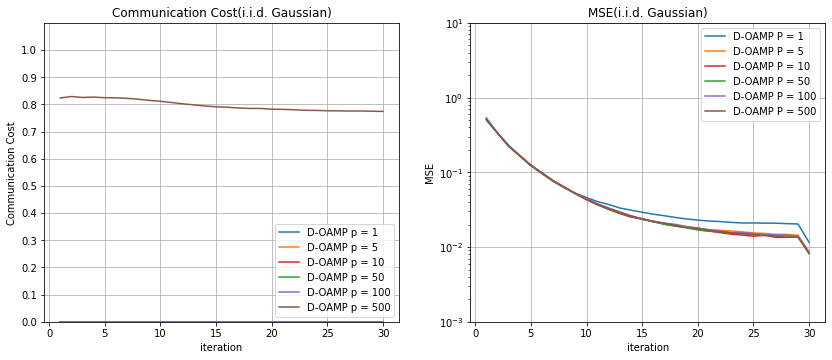

In [9]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
for i in range(lp):
	plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP p = '+str(Ps[i]), T, N, Ps[i], color[i])
plt.grid()


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
for i in range(lp):
	plt_MSE(MSE_iidG_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, color[i])
plt.grid()

/home/ryota/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard


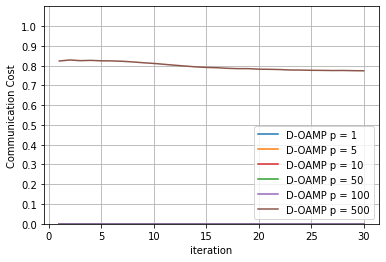

In [10]:
for i in range(lp):
	plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP p = '+str(Ps[i]), T, N, Ps[i], color[i])
plt.grid()

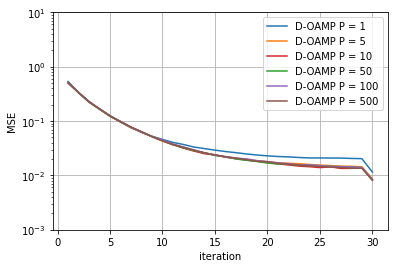

In [11]:
for i in range(lp):
	plt_MSE(MSE_iidG_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, color[i])
plt.grid()

# ユニタリ不変行列での信号再構成

In [12]:
MSE_UniInv_doamp = np.empty((sim, lp, T+1))
CommCost_UniInv_doamp = np.empty((sim, lp, T))

In [13]:
for i in tqdm(range(sim)):
    UniInv = UniInvar(M, N, kappa)

    doamp = [D_OAMP(UniInv.A, x[i], SNR, P) for P in Ps]

    for j in range(lp):
        doamp[j].estimate(T)
        MSE_UniInv_doamp[i, j] = doamp[j].mse
        CommCost_UniInv_doamp[i, j] = doamp[j].communication_cost

100%|██████████| 100/100 [13:50:27<00:00, 498.27s/it]


In [14]:
MSE_UniInv_doamp_mean = np.empty((lp, T+1))
CommCost_UniInv_doamp_mean = np.empty((lp, T))

for i in range(lp):
    MSE_UniInv_doamp_mean[i] = np.mean(MSE_UniInv_doamp[:, i], axis=0)
    CommCost_UniInv_doamp_mean[i] = np.mean(CommCost_UniInv_doamp[:, i], axis=0)

/home/ryota/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard


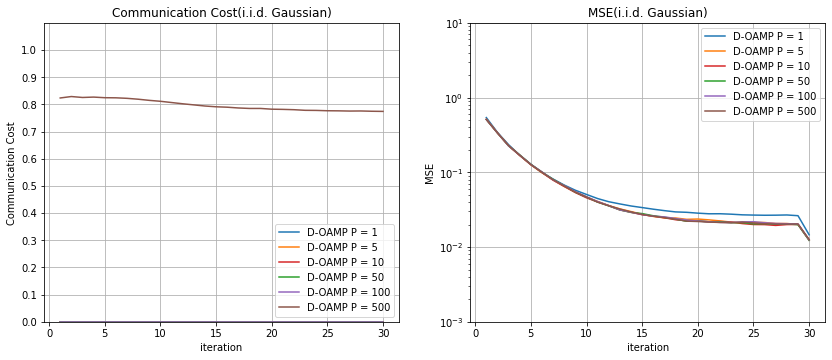

In [15]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
for i in range(lp):
    plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, N, Ps[i], color[i])
plt.grid()


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
for i in range(lp):
    plt_MSE(MSE_UniInv_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, color[i])
plt.grid()

/home/ryota/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard


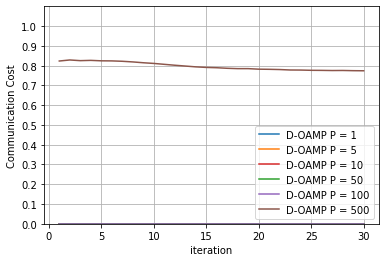

In [16]:
for i in range(lp):
    plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, N, Ps[i], color[i])
plt.grid()

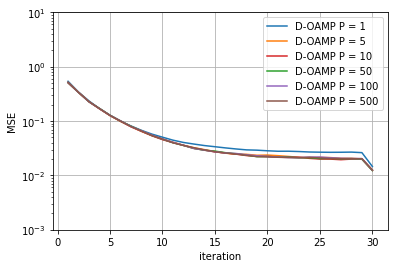

In [17]:
for i in range(lp):
    plt_MSE(MSE_UniInv_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, color[i])
plt.grid()